## Digit Recognizer
https://www.kaggle.com/competitions/digit-recognizer

a model big enough to dethrone your phat mom

In [27]:
import keras
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

In [28]:
train = pl.read_csv('train.csv')
X = train.drop('label').to_numpy()
Y = train[:, 0].to_numpy()

In [29]:
# train_x = X[:40000]
# train_y = Y[:40000]
# test_x = X[40000:]
# test_y = Y[40000:]

In [30]:
# train_x = np.reshape(train_x, (40000, 28, 28))
# test_x = np.reshape(test_x, (2000, 28, 28))
# train_y = keras.utils.to_categorical(train_y)
# test_y = keras.utils.to_categorical(test_y)

In [31]:
# fuck the tests we ballin
train_x = X
train_y = Y
train_x = np.reshape(train_x, (-1, 28, 28))
train_y = keras.utils.to_categorical(train_y)

Text(0.5, 1.0, 'train_data[0] = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]')

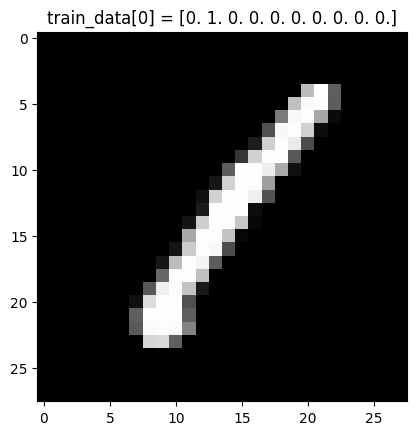

In [32]:
plt.imshow(train_x[0], 'gray')
plt.title("train_data[0] = " + str(train_y[0]))

In [33]:
# quality of life
Sequential = keras.models.Sequential
layers = keras.layers

In [53]:
model = Sequential([
  layers.Conv2D(72, 3, padding='valid', activation='relu', input_shape=(28, 28, 1)),
  layers.AveragePooling2D(2),
  layers.Conv2D(96, 3, padding='same', activation='relu'),
  layers.Conv2D(144, 3, padding='same', activation='relu'),
  layers.AveragePooling2D(2),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(196, activation='relu'),
  layers.Dense(88, activation='relu'),
  layers.Dense(36, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [54]:
model.compile(
  loss=keras.losses.categorical_crossentropy,
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 26, 26, 72)     │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 13, 13, 72)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 13, 13, 96)     │        62,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 13, 13, 144)    │       124,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_12            │ (None, 6, 6, 144)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1024)           │     5,309,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 196)            │       100,548 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 88)             │        17,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 36)             │         3,204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │           370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,143,282 (23.43 MB)

 Trainable params: 6,143,282 (23.43 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.fit(train_x, train_y, epochs=20)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 86s 66ms/step - accuracy: 0.9751 - loss: 0.0906
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 89s 67ms/step - accuracy: 0.9848 - loss: 0.0556
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 91s 69ms/step - accuracy: 0.9887 - loss: 0.0433
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 88s 67ms/step - accuracy: 0.9911 - loss: 0.0375
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 88s 67ms/step - accuracy: 0.9933 - loss: 0.0289
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 94s 72ms/step - accuracy: 0.9932 - loss: 0.0330
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 89s 68ms/step - accuracy: 0.9942 - loss: 0.0254
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 92s 70ms/step - accuracy: 0.9962 - loss: 0.0191
Epoch 9/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 94s 72ms/step - accuracy: 0.9962 - loss: 0.0164
Epoch 10/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 91s 70ms/step - accuracy: 0.9954 - loss: 0.0209
Epoch 11/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 89s 68ms/step - accuracy: 0.9958 - loss: 0.0207
Epoch 12

In [23]:
# model.evaluate(test_x, test_y)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9821 - loss: 0.0862


[0.07703307271003723, 0.984000027179718]

In [57]:
kaggle = pl.read_csv('test.csv')
kaggle = kaggle.to_numpy()
kaggle = np.reshape(kaggle, (28000, 28, 28))
predict = model.predict(kaggle)

875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step


In [58]:
submission = pl.DataFrame({
  "ImageId": [i+1 for i in range(28000)],
  "Label": predict.argmax(axis=1)
})
submission.write_csv("submission.csv")